In [ ]:
!pip cache purge
!pip install tensorflowjs
!pip install ultralytics
!pip install tensorflow-decision-forests==1.5.0
!pip install tensorflow==2.13.1

Files removed: 39
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling pac

In [ ]:

import tensorflow as tf
print(tf.__version__)
import tensorflowjs as tfjs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import pad_sequences
import codecs
import csv


2.13.1


In [ ]:
#data = pd.read_excel('data4.xlsx')
data = pd.read_excel('train.xlsx')
#with codecs.open('data4.csv', 'r', encoding='utf-8', errors='ignore') as fdata:
  #data=pd.read_csv(fdata)


In 10 dong dau tien

In [ ]:
data.head(10)


,Rating,Comment,Label
0,5,"Chất lượng sản phẩm tuyệt vời, má",0
1,5,Jdjd is a waste of my time and place to ask qu...,1
2,5,Dhnxncbcncncncncnncncncnncncncncncncncnncncncj...,1
3,5,"giao hàng nhanh, đóng gói cẩn thận, sản phẩm n...",0
4,3,Bạt mỏng vs lại không có túi đi kèm để cất khi...,0
5,1,Đo size đúng theo hướng dẫn của shop nhưng vẫn...,0
6,5,"Nói chung ổn dễ dùng, ko sắc nét đc như máy bt...",0
7,4,"hàng đúng y hình, chưa dùng nên chưa biết chất...",1
8,5,"Shop giao hàng nhanh, tư vấn nhiệt tình lắm lu...",0
9,5,"📣📣📣 TIN HOT TIN HOT CẢ NHÀ ƠI, BÁNH TRÁNG TRỘN...",1


In [ ]:
data.groupby('Label').describe().T

Label                    0            1
Rating count  10613.000000  3693.000000
       mean       4.829266     4.928784
       std        0.687007     0.424810
       min        1.000000     1.000000
       25%        5.000000     5.000000
       50%        5.000000     5.000000
       75%        5.000000     5.000000
       max        5.000000     5.000000

<Axes: ylabel='count'>

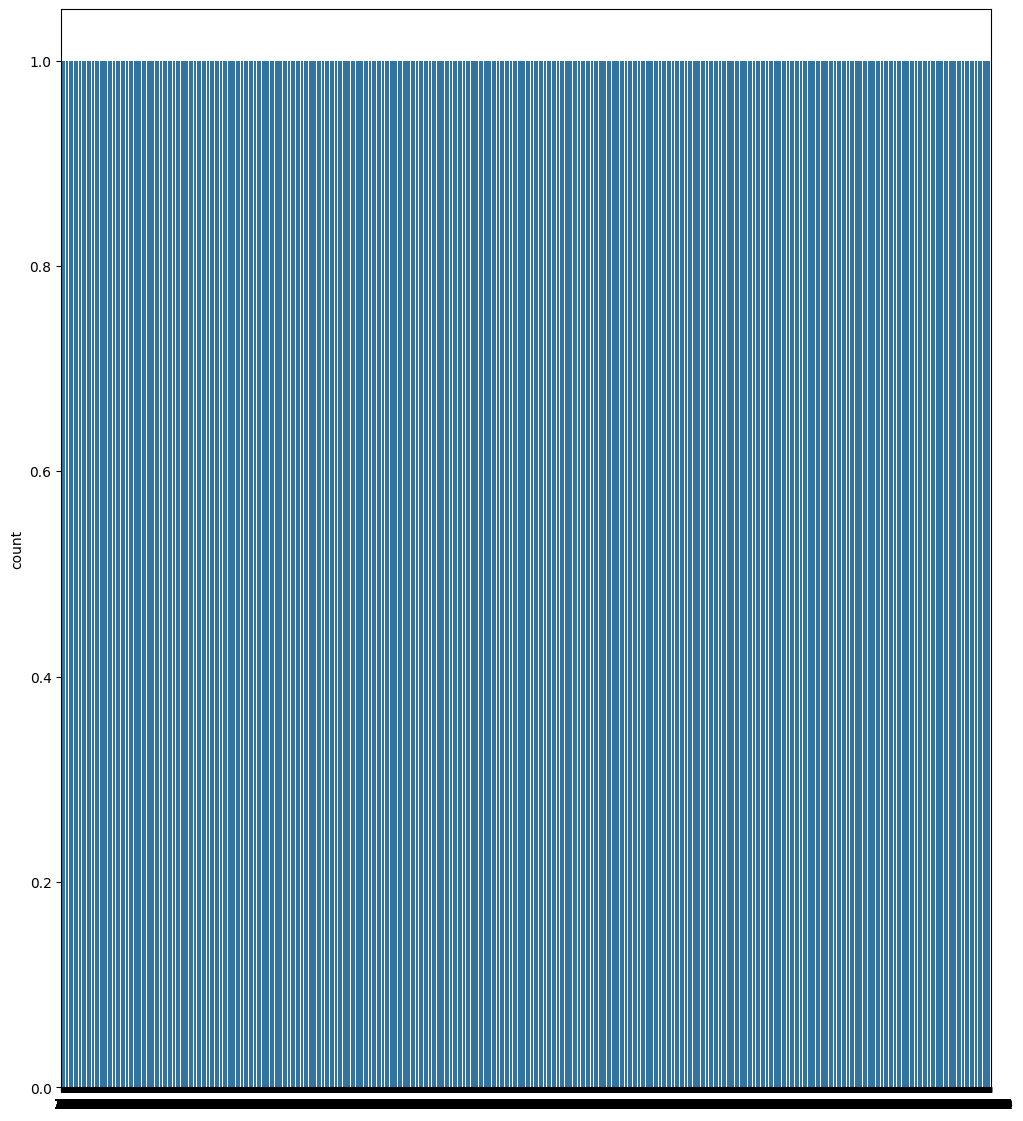

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['Label'])

In [ ]:
vie_msg = pd.DataFrame(data[data.Label ==0])
spam_msg = pd.DataFrame(data[data.Label==1])

In [ ]:
#randomly taking data from ham_ msg
ham_msg=vie_msg.sample(n=len(spam_msg),random_state=42, replace= True)
print(ham_msg)

       Rating                                            Comment  Label
9732        5  Mưa gió, covid nên giao hàng có chậm một chút ...      0
1133        4                               Rỉ nước ra đường may      0
7189        5  dây kháng lực miniband của shop có đề sẵn mức ...      0
6928        5  Hàng chính hãng chạy êm shop đóng gói kỹ càng ...      0
7644        5  Shop giao nhanh đóng hàng cẩn thận hàng đpej g...      0
...       ...                                                ...    ...
5891        5  Dây giày. Không biết mua làm gì, cũng không hi...      0
5101        5  Chất lượng sản phẩm tốt. Thời gian giao hàng n...      0
12337       3  - Ngoại hình thì OK nhưng chất lượng thì không...      0
3282        5  Quần mát màu đẹp,các đường thì là dán keo vì q...      0
821         5                     Sản phẩm tốt, phù hợp giá tiền      0

[3693 rows x 3 columns]


In [ ]:
print(ham_msg.shape,spam_msg.shape)

(3693, 3) (3693, 3)


Text(0.5, 0, 'Bình luận')

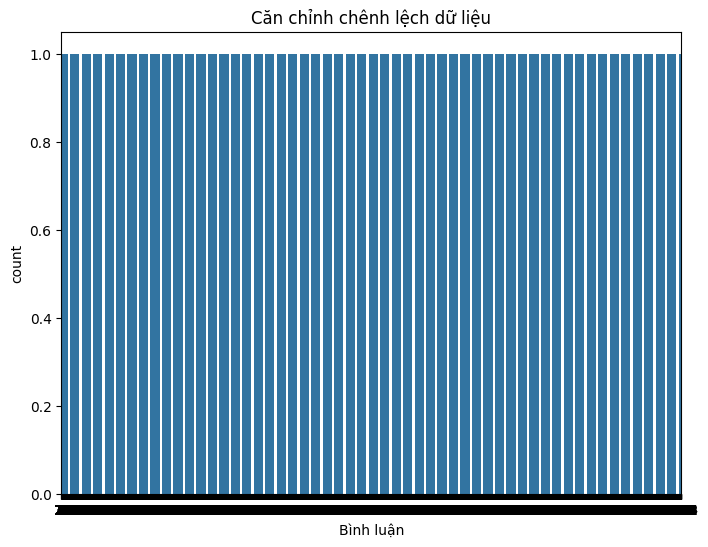

In [ ]:
balanced_data=ham_msg._append(spam_msg).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.Label)
plt.title('Căn chỉnh chênh lệch dữ liệu')
plt.xlabel('Bình luận')

Gan nhan cho du lieu csv

In [ ]:
#balanced_data['label']=balanced_data['Category'].map({'vie':0,'spam':1})
print(balanced_data)

      Rating                                            Comment  Label
0          5  Mưa gió, covid nên giao hàng có chậm một chút ...      0
1          4                               Rỉ nước ra đường may      0
2          5  dây kháng lực miniband của shop có đề sẵn mức ...      0
3          5  Hàng chính hãng chạy êm shop đóng gói kỹ càng ...      0
4          5  Shop giao nhanh đóng hàng cẩn thận hàng đpej g...      0
...      ...                                                ...    ...
7381       5  7 cách ăn đủ 5, 6 bữa cho người bị tiểu đường....      1
7382       5                                           Giá rẻ 💚      1
7383       5  - xd loại thị thực đang apply và những thông t...      1
7384       5  Ngbivjvhvuvuvuvuvjhckgckhckhcmgcjgxbjvvhvhvhvh...      1
7385       5  After the busy days in the city, what I like t...      1

[7386 rows x 3 columns]


In [ ]:
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['Comment'],balanced_data['Label'],test_size=0.2,random_state=434)
train_msg = [str(msg) for msg in train_msg]
train_msg = pd.Series(train_msg, name='Comment')
test_msg = [str(msg) for msg in test_msg]
test_msg = pd.Series(test_msg, name='Comment')
print(train_msg)
print(train_labels)

0       Shop dễ thương lắm nha. Mình ở xa nhờ bạn nhận...
1             Sản phẩm ổn như hình. Mùa dịch ship hơi lâu
2                                            xe đẹp, chắc
3       Giao hàng nhanh\nĐt sử dụng tốt\nTuy nhiên tik...
4       Đóng gói cẩn thận lắm luôn, ship Hà Nội đắt và...
                              ...                        
5903    đánh giá shopee from shopeeplus.com\nFeb 7, 20...
5904    Hàng ok lắm ạ. Mỗi tội shop bảo tặng dây mạng ...
5905    Uiiii khung với hình thật sự đẹp lắm mn ơiiii ...
5906    Giao hàng siêu nhanh..đồ nhìn xinh ghê. Chưa d...
5907    Shop in có tâm cực íii dù mình in 1 đống linh ...
Name: Comment, Length: 5908, dtype: object
5064    1
531     0
1500    0
1600    0
6862    1
       ..
5013    1
1349    0
3192    0
5554    1
1809    0
Name: Label, Length: 5908, dtype: int64


In [ ]:
vocab_size=3000
oov_tok='<OOV>'
max_len=50

In [ ]:
#tiền xử lý tạo mã thông báo ra khỏi văn bản (Anh xa van ban thanh con so de bieu dien duoi dang tensor tesnor)
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)
print(train_msg)

0       Shop dễ thương lắm nha. Mình ở xa nhờ bạn nhận...
1             Sản phẩm ổn như hình. Mùa dịch ship hơi lâu
2                                            xe đẹp, chắc
3       Giao hàng nhanh\nĐt sử dụng tốt\nTuy nhiên tik...
4       Đóng gói cẩn thận lắm luôn, ship Hà Nội đắt và...
                              ...                        
5903    đánh giá shopee from shopeeplus.com\nFeb 7, 20...
5904    Hàng ok lắm ạ. Mỗi tội shop bảo tặng dây mạng ...
5905    Uiiii khung với hình thật sự đẹp lắm mn ơiiii ...
5906    Giao hàng siêu nhanh..đồ nhìn xinh ghê. Chưa d...
5907    Shop in có tâm cực íii dù mình in 1 đống linh ...
Name: Comment, Length: 5908, dtype: object


In [ ]:
word_index=token.word_index
word_index

{'<OOV>': 1,
 'hàng': 2,
 'giao': 3,
 'nhanh': 4,
 'shop': 5,
 'rất': 6,
 'có': 7,
 'mua': 8,
 'mình': 9,
 'sản': 10,
 'phẩm': 11,
 'chất': 12,
 'nên': 13,
 'giá': 14,
 'và': 15,
 'không': 16,
 'gói': 17,
 'đẹp': 18,
 'tốt': 19,
 'là': 20,
 'lượng': 21,
 'đóng': 22,
 'ok': 23,
 'được': 24,
 'nhưng': 25,
 'thì': 26,
 'cho': 27,
 'dùng': 28,
 'với': 29,
 'nhận': 30,
 'mà': 31,
 'sẽ': 32,
 'như': 33,
 'chưa': 34,
 'cũng': 35,
 'đã': 36,
 'của': 37,
 '1': 38,
 'lắm': 39,
 'hình': 40,
 'này': 41,
 'luôn': 42,
 'để': 43,
 'ko': 44,
 'nhiều': 45,
 'hơn': 46,
 'cẩn': 47,
 'hơi': 48,
 'thận': 49,
 'mới': 50,
 'chắc': 51,
 'bị': 52,
 'lần': 53,
 'thấy': 54,
 'tiki': 55,
 'lại': 56,
 'cảm': 57,
 'người': 58,
 'hộ': 59,
 'còn': 60,
 'trong': 61,
 'khá': 62,
 'rẻ': 63,
 'đặt': 64,
 'biết': 65,
 'ạ': 66,
 'sau': 67,
 'ủng': 68,
 'nha': 69,
 'quá': 70,
 'rồi': 71,
 'k': 72,
 'dụng': 73,
 'các': 74,
 'chỉ': 75,
 'đúng': 76,
 'ảnh': 77,
 'khi': 78,
 'ổn': 79,
 'về': 80,
 'chắn': 81,
 'dễ': 82,
 '2': 83

In [ ]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=20,padding=padding_type,truncating=truncate_type)
print(Trainning_pad)

[[   5   82  208 ...  664   96   25]
 [  10   11   79 ...    0    0    0]
 [ 218   18   51 ...    0    0    0]
 ...
 [   1 1873   29 ...    7  289 2087]
 [   3    2  138 ... 1501   54  344]
 [   5  358    7 ...   74    1   77]]


In [ ]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=20,padding=padding_type,truncating=truncate_type)

In [ ]:
#model su dung mang than kinh don gian
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=20),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [ ]:
epoch=100
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#bat dau train du lieu
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),callbacks=[early_stop], epochs=epoch,verbose=2) #callbacks=[early_stop], thêm callbacks để dừng việc huấn luyện

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


185/185 - 2s - loss: 0.6479 - accuracy: 0.6649 - val_loss: 0.5617 - val_accuracy: 0.7307 - 2s/epoch - 11ms/step
Epoch 2/100
185/185 - 1s - loss: 0.5012 - accuracy: 0.7701 - val_loss: 0.4463 - val_accuracy: 0.7876 - 579ms/epoch - 3ms/step
Epoch 3/100
185/185 - 1s - loss: 0.4162 - accuracy: 0.8155 - val_loss: 0.4230 - val_accuracy: 0.8099 - 888ms/epoch - 5ms/step
Epoch 4/100
185/185 - 1s - loss: 0.3787 - accuracy: 0.8378 - val_loss: 0.4192 - val_accuracy: 0.8119 - 1s/epoch - 6ms/step
Epoch 5/100
185/185 - 1s - loss: 0.3527 - accuracy: 0.8532 - val_loss: 0.4193 - val_accuracy: 0.8058 - 1s/epoch - 7ms/step
Epoch 6/100
185/185 - 1s - loss: 0.3276 - accuracy: 0.8648 - val_loss: 0.4304 - val_accuracy: 0.8153 - 938ms/epoch - 5ms/step
Epoch 7/100
185/185 - 1s - loss: 0.3088 - accuracy: 0.8771 - val_loss: 0.4311 - val_accuracy: 0.8139 - 864ms/epoch - 5ms/step


In [ ]:
model.evaluate(Testing_pad, test_labels)

47/47 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8139


[0.4310978055000305, 0.813937783241272]

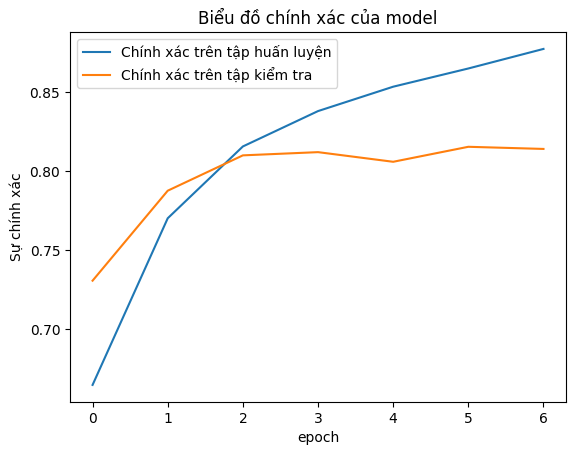

In [ ]:
plt.plot(history.history['accuracy'], label='Chính xác trên tập huấn luyện')
plt.plot(history.history['val_accuracy'], label='Chính xác trên tập kiểm tra')
plt.title('Biểu đồ chính xác của model')
plt.ylabel('Sự chính xác')
plt.xlabel('epoch')
plt.legend()

In [ ]:
import json
import os
def export_model(model, words_vocab, site_path):
    tfjs.converters.save_keras_model(
        model,
        os.path.join(site_path, './tfjs_models/ner/')
        )

    with open(os.path.join(site_path, "./vocabs.js"), 'w') as f:
        f.write('const words_vocab = {\n')
        for l in json.dumps(words_vocab)[1:-1].split(","):
            f.write("\t"+l+',\n')
        f.write('};\n')

    print('model exported to ', site_path)

export_model(model, word_index, "model/converted")
#tfjs.converters.save_keras_model(model, "model/converted")


model exported to  model/converted


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predict_msg = ["Đóng gói và giao hàng nhanh. Shipper thân thiện! Hàng ngon,rẻ! Có dịp quay lại ủng hộ shop sau nhé!"]


In [ ]:
#function kiểm tra dữ liệu có phải spam hay không
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =20,
                      padding = padding_type,
                      truncating='post')
    print(padded)
    return (model.predict(padded))
predict_spam(predict_msg)

[[ 22  17  15   3   2   4 296 312 389   2 118  63   7 844 357  56  68  59
    5  67]]
1/1 [==============================] - 0s 113ms/step


array([[0.19634512]], dtype=float32)